### Estudo de caso de problema de alcoolismo em jovens (base de dados fictícia).
***

In [2]:
#Imports
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Data/2feats.csv')
df_copy = df.copy(deep=True)
display(df.describe().transpose())
display(df.tail())

,count,mean,std,min,25%,50%,75%,max
goout,395.0,3.108861,1.113278,1.0,2.0,3.0,4.0,5.0
absences,395.0,5.708861,8.003096,0.0,0.0,4.0,8.0,75.0
target,395.0,0.205063,0.404260,0.0,0.0,0.0,0.0,1.0


,goout,absences,target
390,4,11,1
391,5,3,1
392,3,3,0
393,1,0,1
394,3,5,0


In [4]:
# Para tornar melgor a compreenção, foram alterados os nomes das colunas. (('Saidas' = Quantas vezes o aluno sai durante a semana)).
df = df_copy.rename(columns={'goout' : 'Saidas','absences':'Faltas', 'target' : 'Target'})
display(df.head())

,Saidas,Faltas,Target
0,4,6,0
1,3,4,0
2,2,10,0
3,2,2,0
4,2,4,0


***
- Exploração inicial dos dados
***

In [5]:
# Separando os dados em variável preditiva (X) e variável resposta (y).
X = df[['Saidas', 'Faltas']]
y = df['Target']

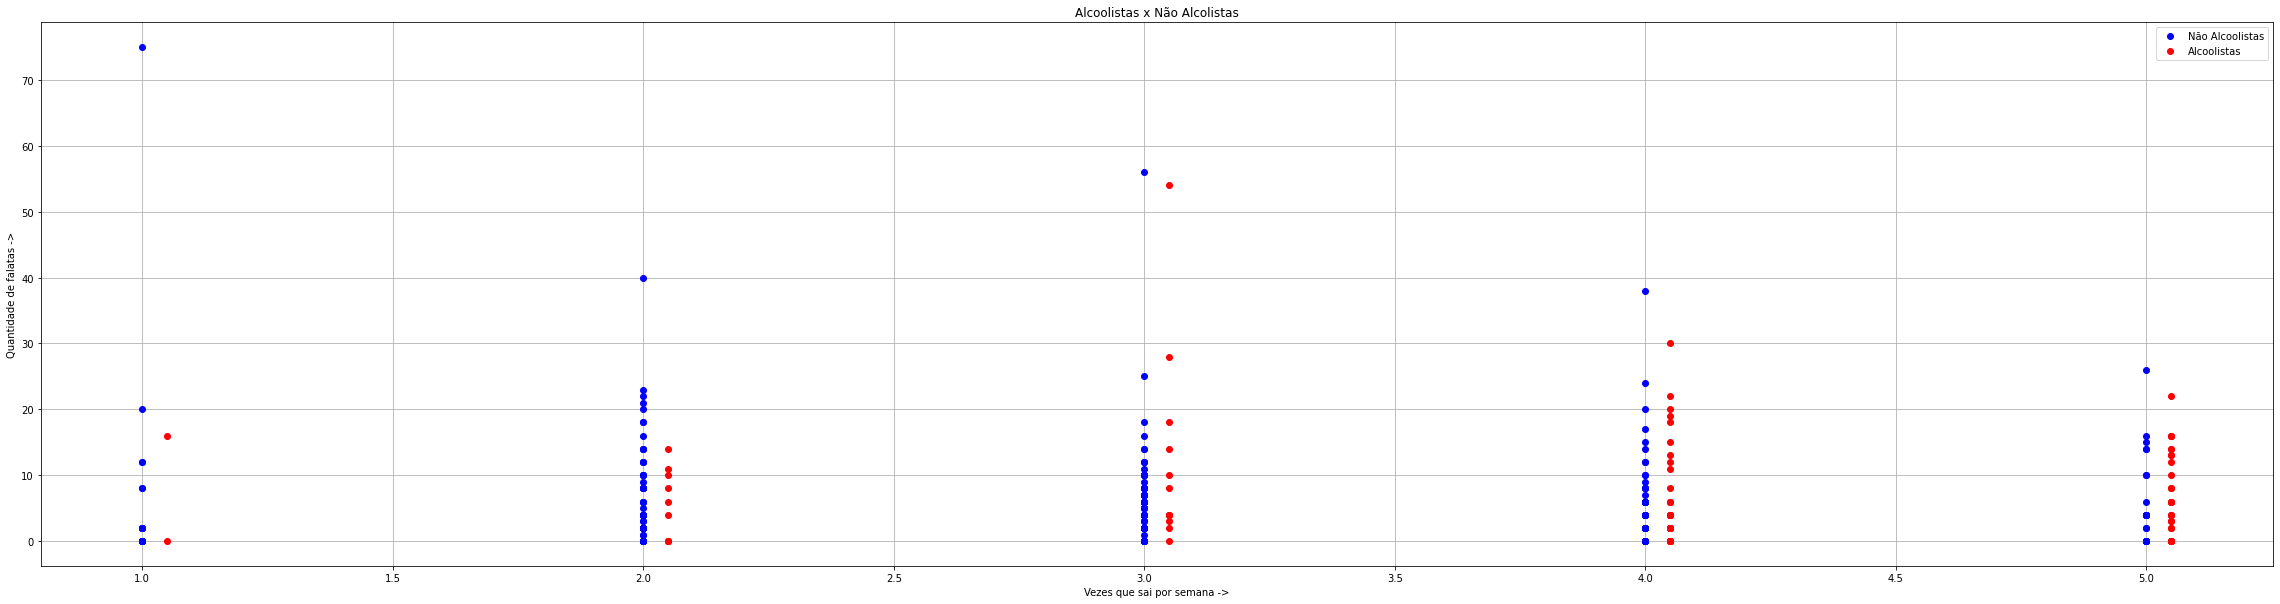

In [6]:
# Criando parâmetros para análise
alcoolistas = y==1
nAlcoolistas = y==0

#Plot para análise gráfica
plt.figure(figsize=(40,10))
plt.plot(X['Saidas'][nAlcoolistas], X['Faltas'][nAlcoolistas], 'bo', label= 'Não Alcoolistas')
plt.plot(X['Saidas'][alcoolistas] + 0.05, X['Faltas'][alcoolistas], 'ro', label= 'Alcoolistas') #Onde '+ 0.5' foi inserido apenas para dar um espaçamento visual maior no plt

plt.title("Alcoolistas x Não Alcolistas")
plt.xlabel('Vezes que sai por semana ->')
plt.ylabel('Quantidade de falatas ->')
plt.legend()
plt.grid()
plt.show()

- Definição de uma função para análise gráfica do comportamento do modelo que será feito logo em seguida: 
- ###### <b>Função retirada da própria biblioteca do sklearning adaptada para os dados utilizados

In [7]:
def comportModelo (dt,X,y):
    import numpy as np
    import matplotlib.pyplot as plt

    #Separando dados
    alcoolistas = y==1
    nAlcoolistas = y==0
    # Criando matriz de coordenadas de vetores de coordenadas
    xx,yy = np.meshgrid(
    np.arange(0.8,5.2,0.01),
    np.arange(-3,80,0.01)
    )
    zz = dt.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1].reshape(xx.shape)

    plt.figure(figsize=(40,10))
    plt.plot(X['Saidas'][nAlcoolistas], X['Faltas'][nAlcoolistas], 'bo', label= 'Não Alcoolistas')
    plt.plot(X['Saidas'][alcoolistas] + 0.05, X['Faltas'][alcoolistas], 'ro', label= 'Alcoolistas')
    plt.contourf(xx,yy,zz,cmap='RdBu_r',alpha=.6, vmin=0, vmax=1)
    plt.colorbar()

    plt.title("Alcoolistas x Não Alcolistas")
    plt.xlabel('Vezes que sai por semana ->')
    plt.ylabel('Quantidade de falatas ->')
    plt.legend()
    plt.xlim(0.8,5.2)
    plt.ylim(-3,80)
    plt.grid()
    plt.show()
        

***
- Utilizando modelos de Árvore de decisão
***

In [8]:
#Imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score , recall_score

In [9]:
#Criando modelo sem utilizar qualquer tipo de parâmetros para comparações
dt = DecisionTreeClassifier()
dt.fit(X,y)

print(round(precision_score(y,dt.predict(X)) * 100) , '% de precisão no total de Alcolistas.')
print(round(recall_score(y, dt.predict(X)) *100), '% de precisão do que os aceros do modelo representam no universo analisado.')


93 % de precisão no total de Alcolistas.
31 % de precisão do que os aceros do modelo representam no universo analisado.


- Com base nesses dados, poderíamos dizer que o modelo tem ótimos resultados. Mas...
***

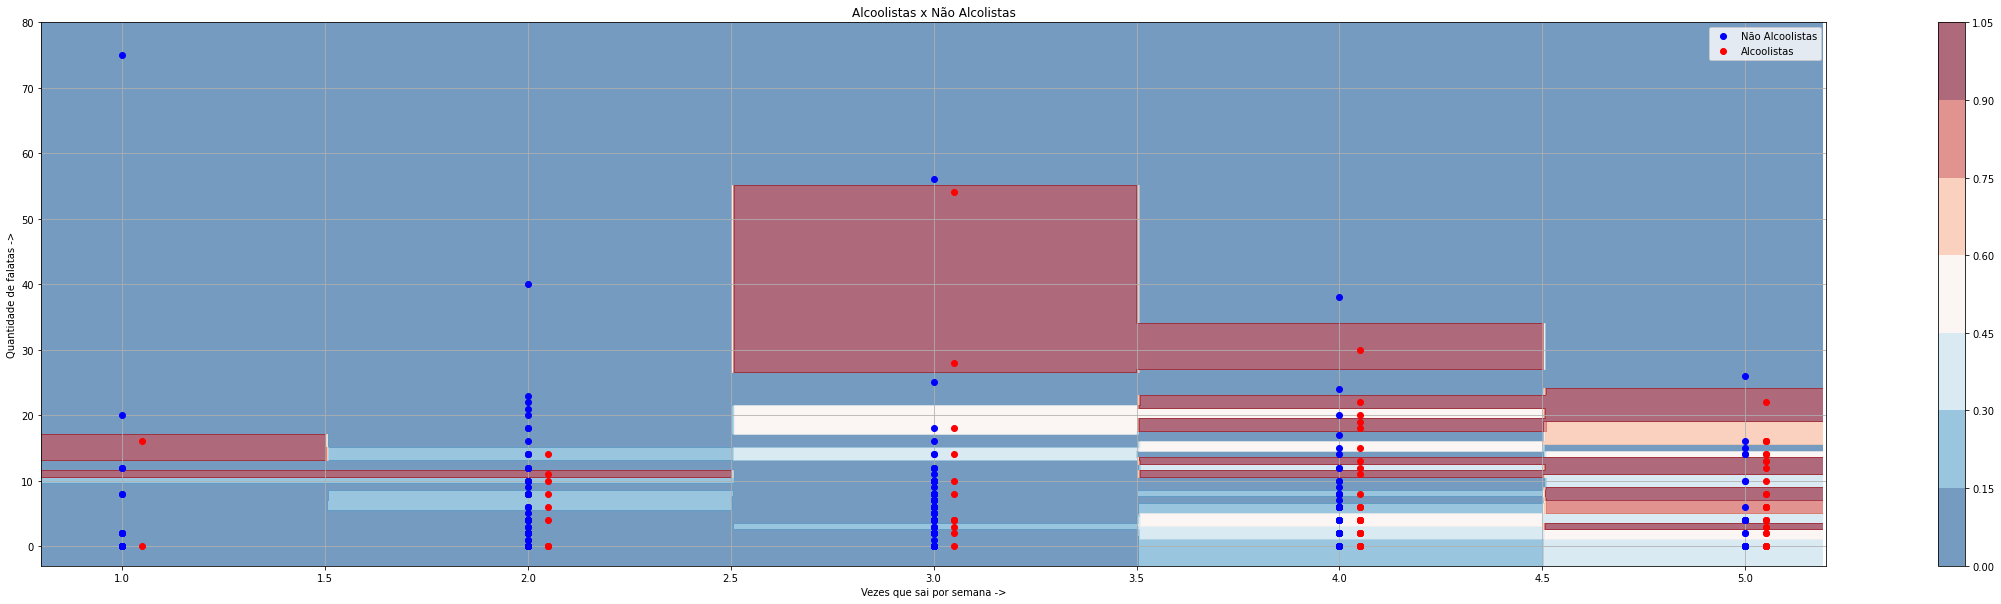

In [10]:
#Utilizando função para teste de resultados
comportModelo(dt,X,y)

##### Análise visual
- Há uma grande quantidade de cortes e áreas onde o modelo simplesmente não consegue analisar os dados (áreas brancas);
- Isso ocorreu pelo fato do modelo ter sido treinado sem qualquer tipo de parâmetros. Tendo vários nós com apenas 1 amostra, generalizando assim as áreas subsequentes;
- Nota-se então, uma grande propensão ao overfiting (generalização) no modelo.
***

#### - Ajustando os parâmetros do modelo por validação cruzada

In [11]:
#Separando dados em dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.50, random_state=10)

In [12]:
#Criando estrutura de repetição para uma pré -análise de melhor profundidade
for md in range(2,11):
    dt = DecisionTreeClassifier(max_depth=md)
    dt.fit(X_train, y_train)
    precision = precision_score(y_test, dt.predict(X_test))
    rec = recall_score(y_test,dt.predict(X_test))

    print('Max Depth = {}  |  {prec:5.2f}  |  {rec:5.2f}'.format(md , prec = precision, rec = rec))    

Max Depth = 2  |   0.00  |   0.00
Max Depth = 3  |   0.50  |   0.18
Max Depth = 4  |   0.50  |   0.18
Max Depth = 5  |   0.43  |   0.24
Max Depth = 6  |   0.42  |   0.21
Max Depth = 7  |   0.33  |   0.08
Max Depth = 8  |   0.45  |   0.13
Max Depth = 9  |   0.45  |   0.13
Max Depth = 10  |   0.40  |   0.11


- Como pode-se notar, a análise visual fica complicada pois nem sempre os parâmetros tendem a alta juntos. Então será usado a métrica F1.
***

In [13]:
bf1 = -1
bmd = 0

for md in range(1,15):
    dt = DecisionTreeClassifier(max_depth=md)
    dt.fit(X_train, y_train)
    precision = precision_score(y_test, dt.predict(X_test))
    rec = recall_score(y_test,dt.predict(X_test))
    f1 = 2/((1/precision)*(1/rec)) 
    if (f1 > bf1):
        bf1 = f1
        bmd = md

    print('Max Depth = {}  |  {prec:5.2f}  |  {rec:5.2f}  |  {f1:5.2f}'.format(md , prec = precision, rec = rec, f1=f1))    
print(bmd)    

Max Depth = 1  |   0.00  |   0.00  |   0.00
Max Depth = 2  |   0.00  |   0.00  |   0.00
Max Depth = 3  |   0.50  |   0.18  |   0.18
Max Depth = 4  |   0.50  |   0.18  |   0.18
Max Depth = 5  |   0.43  |   0.24  |   0.20
Max Depth = 6  |   0.42  |   0.21  |   0.18
Max Depth = 7  |   0.45  |   0.13  |   0.12
Max Depth = 8  |   0.45  |   0.13  |   0.12
Max Depth = 9  |   0.40  |   0.11  |   0.08
Max Depth = 10  |   0.40  |   0.11  |   0.08
Max Depth = 11  |   0.45  |   0.13  |   0.12
Max Depth = 12  |   0.40  |   0.11  |   0.08
Max Depth = 13  |   0.40  |   0.11  |   0.08
Max Depth = 14  |   0.40  |   0.11  |   0.08
5


- Agora em análise visual, além de ficar claro onde o modelo começa generalizar, encontramos como melhor parâmetro.

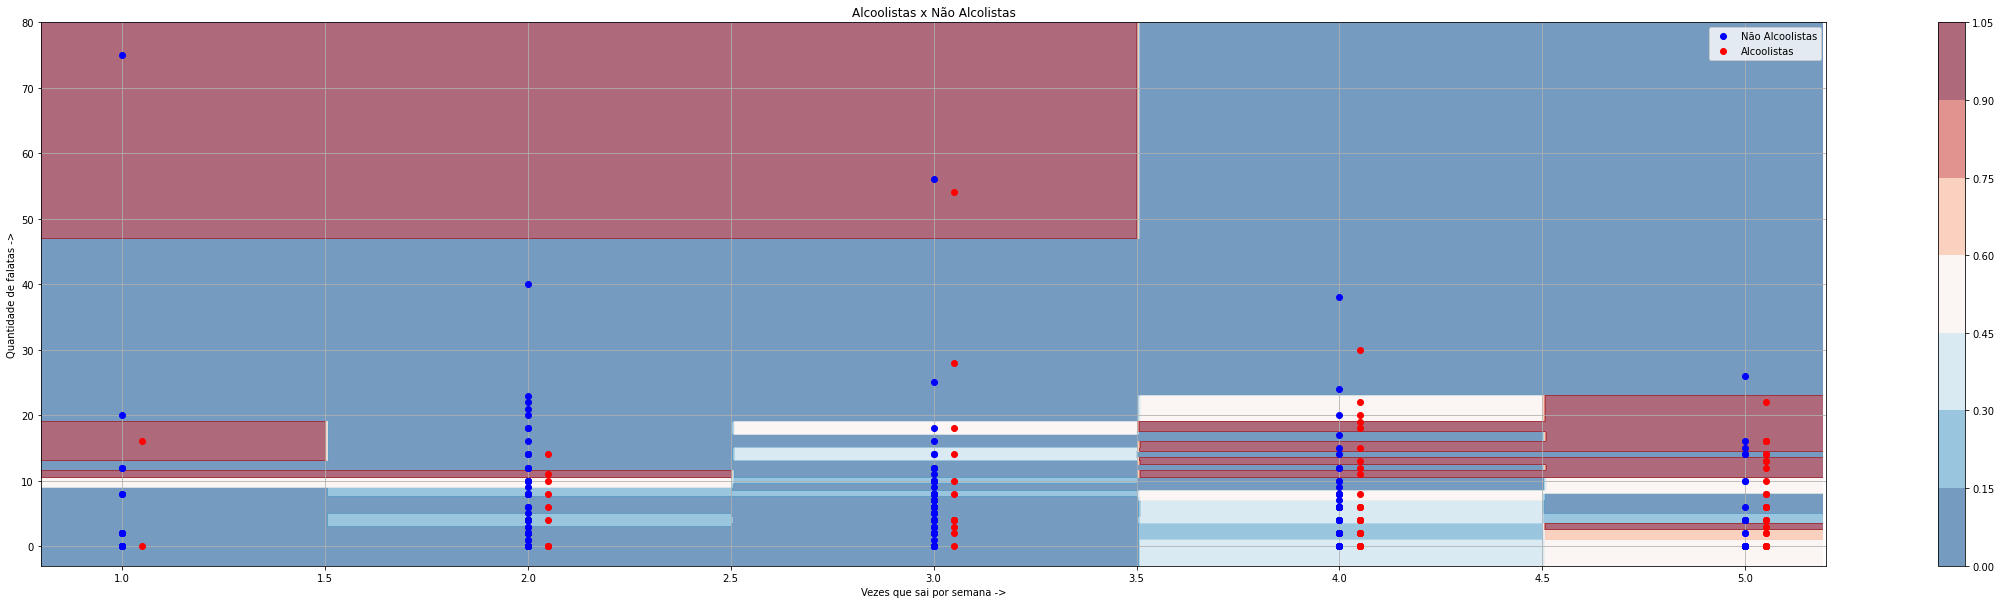

In [14]:
# Utilizando parâmetro encontrado e analisando com auxílio da função criada

dt = DecisionTreeClassifier(max_depth= md)
dt.fit(X_train,y_train)

comportModelo(dt,X,y)

- Pós Análise, nota-se que o modelo não se adequa perfeitamente aos dados (como são fictícios, pode realmente não ter uma lógica). Mesmo assim, vamos testar outros modelos e tentar limpar alguns outliers mais extravagantes.
###### <b> Lembrando que não temos acesso ao cenário real simplesmente por ele não existir. Então, serão removidos outliers com base em análise visual.
***

2. Aprofundamento da Análise

In [15]:
from sklearn.ensemble import RandomForestClassifier

***
- Primeiramente será testado o modelo Randon Forest sem executar nenhuma mudança na base ou no modelo de exploração dos dados
***

In [18]:
bf1rf = -1
bmdrf = -1
for md in range(1,15):
    rf = RandomForestClassifier(max_depth = md , random_state=11)
    rf.fit(X_train, y_train)
    precision = precision_score(y_test, rf.predict(X_test))
    rec = recall_score(y_test, rf.predict(X_test))
    f1rf = 2/((1/precision)*(1/rec)) 
    if (f1rf > bf1rf):
        bf1rf = f1rf
        bmdrf = md
    print('Max Depth = {}  |  {prec:5.2f}  |  {rec:5.2f}  |  {f1:5.2f}'.format(md , prec = precision, rec = rec, f1=f1rf)) 

bmdrf

Max Depth = 1  |   0.00  |   0.00  |   0.00
Max Depth = 2  |   0.50  |   0.05  |   0.05
Max Depth = 3  |   0.67  |   0.11  |   0.14
Max Depth = 4  |   0.40  |   0.21  |   0.17
Max Depth = 5  |   0.41  |   0.18  |   0.15
Max Depth = 6  |   0.41  |   0.18  |   0.15
Max Depth = 7  |   0.33  |   0.18  |   0.12
Max Depth = 8  |   0.33  |   0.18  |   0.12
Max Depth = 9  |   0.36  |   0.21  |   0.15
Max Depth = 10  |   0.33  |   0.18  |   0.12
Max Depth = 11  |   0.33  |   0.18  |   0.12
Max Depth = 12  |   0.33  |   0.18  |   0.12
Max Depth = 13  |   0.33  |   0.18  |   0.12
Max Depth = 14  |   0.33  |   0.18  |   0.12


4

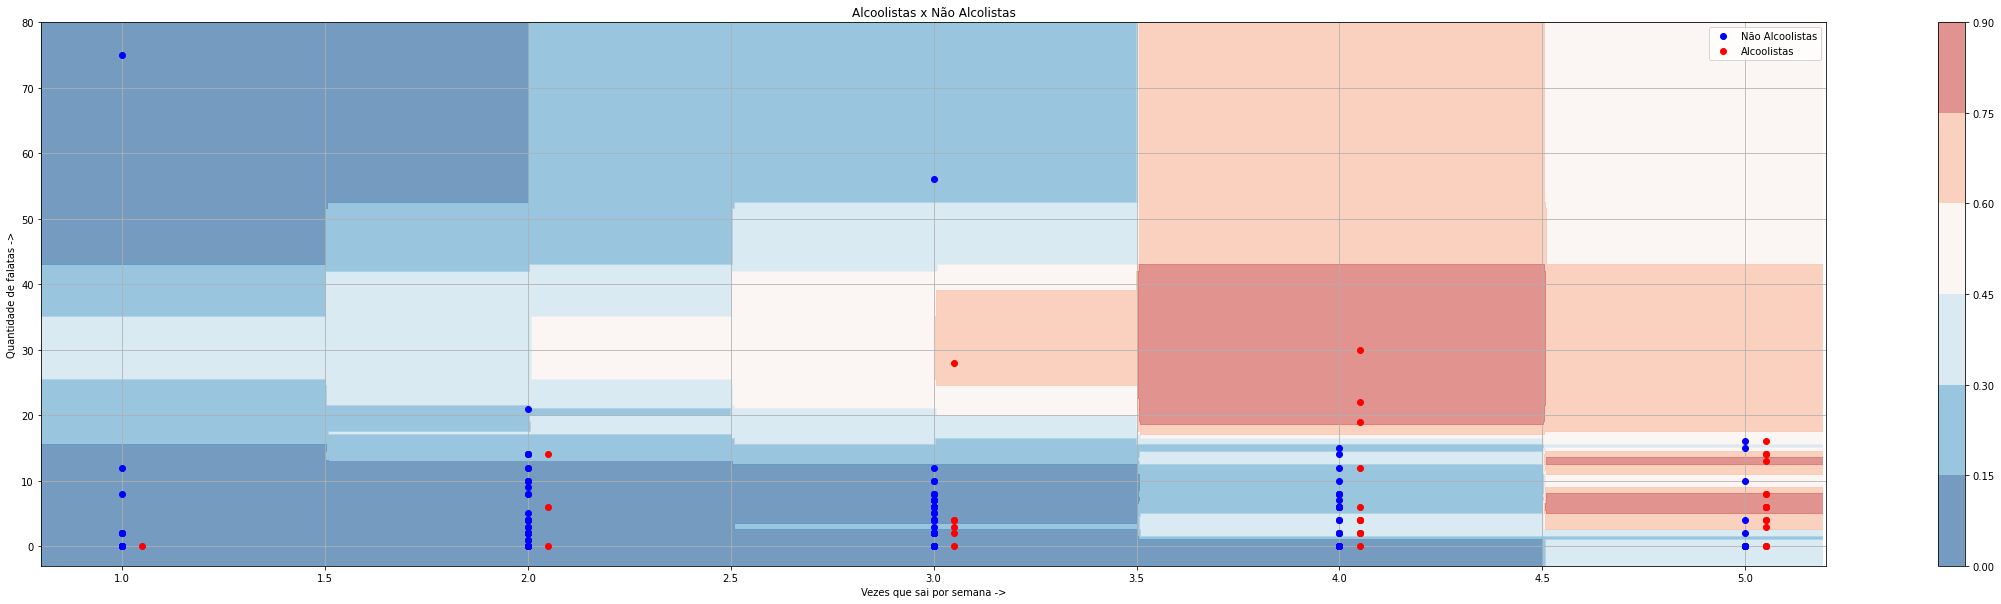

In [21]:
rf = RandomForestClassifier(max_depth = bmdrf , random_state=11)
rf.fit(X_test,y_test)
comportModelo(rf,X_test,y_test)

***
- Removendo outliers e Analisando com Random Forest
***

In [53]:
df1 = df_copy.rename(columns={'goout' : 'Saidas','absences':'Faltas', 'target' : 'Target'})
outliers = df_copy.loc[(df_copy.goout < 3.5) & (df_copy.absences > 50)].index
df1 = df1.drop(outliers)
df1

,Saidas,Faltas,Target
0,4,6,0
1,3,4,0
2,2,10,0
3,2,2,0
4,2,4,0
...,...,...,...
390,4,11,1
391,5,3,1
392,3,3,0
393,1,0,1


In [79]:
X = df1[['Saidas', 'Faltas']]
y = df1['Target']
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.50, random_state=11)

In [80]:
bf1rf = -1
bmdrf = -1
for md in range(1,15):
    rf = RandomForestClassifier(max_depth = md , random_state=10)
    rf.fit(X_train, y_train)
    precision = precision_score(y_test, rf.predict(X_test))
    rec = recall_score(y_test, rf.predict(X_test))
    f1rf = 2/((1/precision)*(1/rec)) 
    if (f1rf > bf1rf):
        bf1rf = f1rf
        bmdrf = md
    print('Max Depth = {}  |  {prec:5.2f}  |  {rec:5.2f}  |  {f1:5.2f}'.format(md , prec = precision, rec = rec, f1=f1rf)) 

bmdrf

Max Depth = 1  |   0.00  |   0.00  |   0.00
Max Depth = 2  |   0.50  |   0.10  |   0.10
Max Depth = 3  |   0.43  |   0.15  |   0.13
Max Depth = 4  |   0.53  |   0.23  |   0.24
Max Depth = 5  |   0.45  |   0.33  |   0.30
Max Depth = 6  |   0.42  |   0.36  |   0.30
Max Depth = 7  |   0.42  |   0.38  |   0.32
Max Depth = 8  |   0.42  |   0.38  |   0.32
Max Depth = 9  |   0.39  |   0.38  |   0.30
Max Depth = 10  |   0.42  |   0.38  |   0.32
Max Depth = 11  |   0.42  |   0.38  |   0.32
Max Depth = 12  |   0.42  |   0.38  |   0.32
Max Depth = 13  |   0.42  |   0.38  |   0.32
Max Depth = 14  |   0.42  |   0.38  |   0.32


7

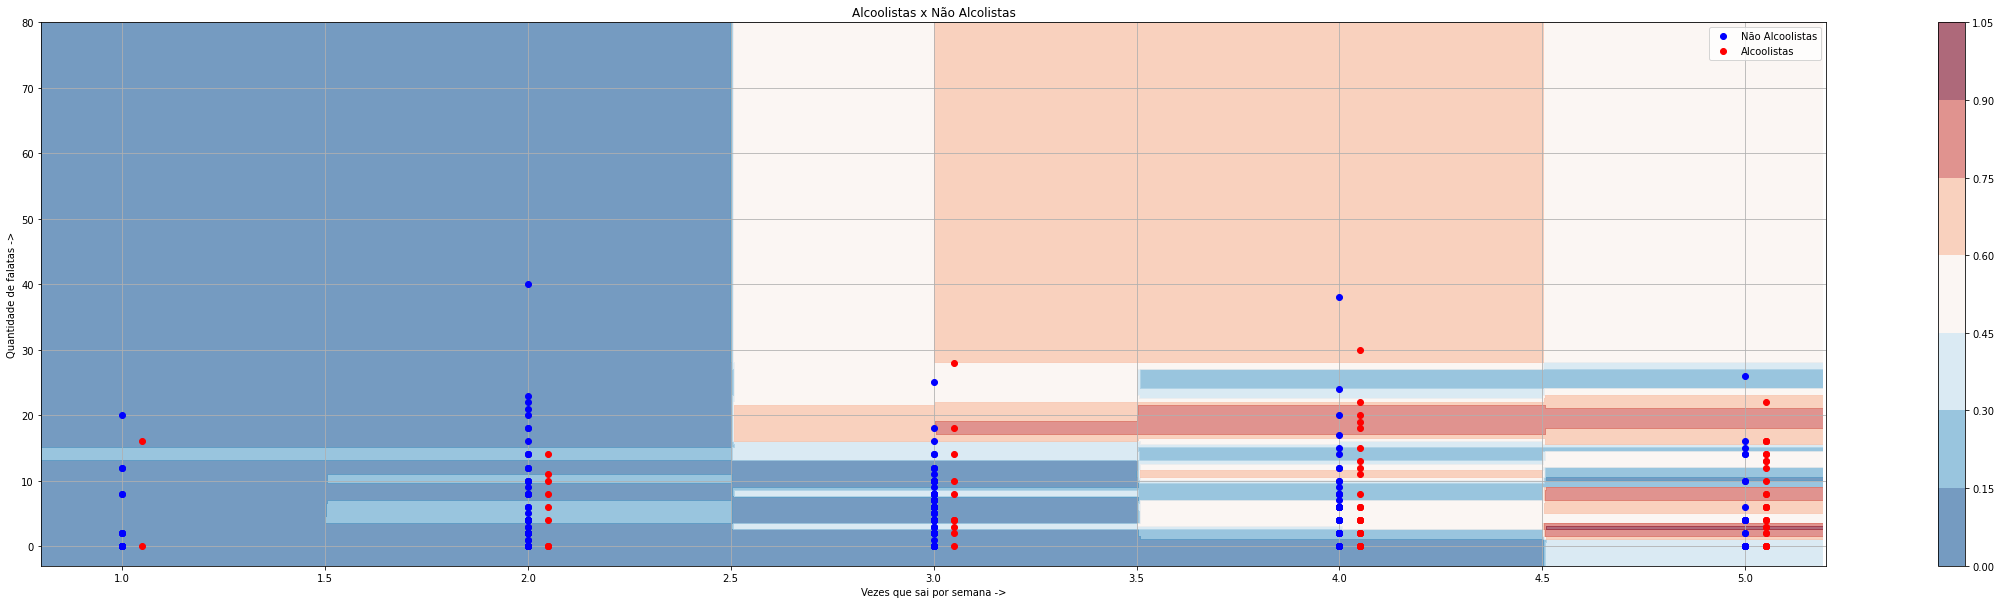

In [81]:
rf = RandomForestClassifier(max_depth = bmdrf , random_state=11)
rf.fit(X_test,y_test)
comportModelo(rf,X,y)

- Nota-se que tendo como base apenas essas duas variáveis, não se pode criar um modelo tão preciso quanto se gostaria. Mas apesar disso, utilizando apenas essas duas técnicas, o modelo se ajusta consideravelmente e tem um score justo para o cenário imposto.
- Será aprofundado o estudo nessa base de dados, no próximo arquivo: "Analise_Exploratoria.ipynb"
***

##### <b> Estudo pautado no primeiro vídeo da série "Machine Learning: do básico ao aplicado" do Canal "Rafinha dos Dados' no Youtube.